In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn')

In [2]:
#create a random dataset with clusters using sklearn
n_points = 100
clusters_centers = [[-0.5, 0.5], [0.5, -0.5]] #coordinates
X, y = datasets.make_blobs(n_samples=n_points, 
                           centers=clusters_centers, 
                           cluster_std=0.4,
                           random_state=2)

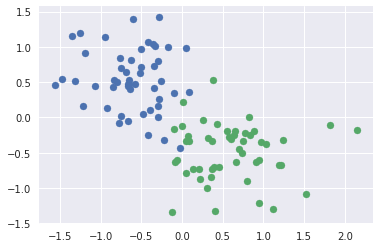

In [3]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
scatter_plot()

In [4]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [5]:
class PerceptronModel(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [6]:
torch.manual_seed(1)
model = PerceptronModel(2, 1)

In [7]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
print(w1.item(), w2.item(), b1.item())

0.36434608697891235 -0.3121015429496765 -0.13708078861236572


In [8]:
def get_params():
    return (w1.item(), w2.item(), b[0].item())

In [9]:
def plot_fit(title):
    plt.title(title)
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0]) #max size of the graph
    x2 = (w1*x1 + b1)/-w2 #line equation 0=w1x1 + w2x2 + b
    plt.plot(x1, x2, 'r')
    scatter_plot()

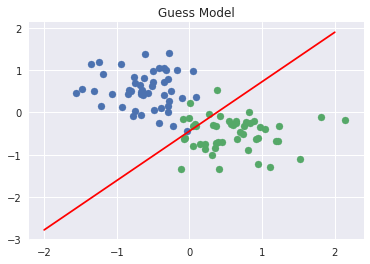

In [10]:
plot_fit("Guess Model")

In [11]:
#Optmization
criterion = torch.nn.BCELoss()# Cross entropy Loss
optmizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [12]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss)
    if i%100==0:
        print("epochs {} - loss {}".format(i, loss.item()))
    
    #reset the gradient value to 0 because they acumulate
    optmizer.zero_grad()
    #calc the derivative of the tangent
    loss.backward()
    #optimize the loss
    optmizer.step()

epochs 0 - loss 0.5290364623069763
epochs 100 - loss 0.22832944989204407
epochs 200 - loss 0.17094865441322327
epochs 300 - loss 0.14573600888252258
epochs 400 - loss 0.13119632005691528
epochs 500 - loss 0.12157078087329865
epochs 600 - loss 0.11463947594165802
epochs 700 - loss 0.10935696959495544
epochs 800 - loss 0.10516341030597687
epochs 900 - loss 0.10173044353723526


Text(0.5, 0, 'epoch')

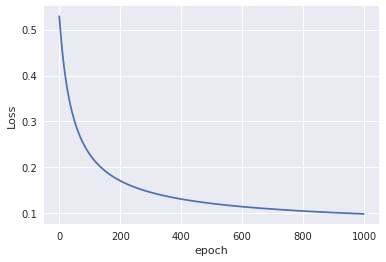

In [13]:
#visualize the gradient descent convergence
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

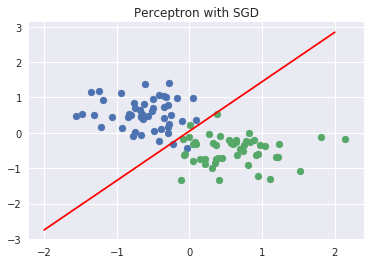

In [14]:
plot_fit(title="Perceptron with SGD")

# Model testing

Red point positive proba = 0.99928879737854
Black point positive proba = 0.0009609588305465877
Red point predicted class = 1
Black point predicted class = 0


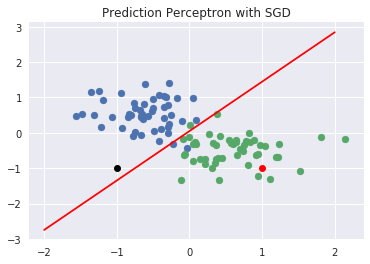

In [15]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0],point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0],point1.numpy()[1], 'ko')
print("Red point positive proba = {}".format(model.forward(point1).item()))
print("Black point positive proba = {}".format(model.forward(point2).item()))
print("Red point predicted class = {}".format(model.predict(point1)))
print("Black point predicted class = {}".format(model.predict(point2)))
plot_fit(title="Prediction Perceptron with SGD")